In [2]:
!pip install numpy pandas scikit-learn seaborn matplotlib opencv-python scikit-image imbalanced-learn tqdm
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install pillow
!pip install einops


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 163.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 153.1 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 147.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 104.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 216.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 148.3 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5━━━━━━━━━━━━━━━━━━━━━━━━  1/13 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [imbalanced-learn][seaborn]mage]]
Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 MB 208.4 MB/s  0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 160.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd

CSV_PATH = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/MASTER_DATASET.csv"
df = pd.read_csv(CSV_PATH)

print(df.shape)
print(df.columns)


(1924, 16)
Index(['image', 'roi_path', 'jet_area', 'jet_width', 'jet_height',
       'jet_length', 'red_ratio', 'orange_yellow_ratio', 'blue_ratio', 'PS',
       'ED', 'Side', 'prox_ica_right_stenosis', 'prox_ica_left_stenosis',
       'detected_side_value', 'Patient_Number'],
      dtype='object')


In [6]:
print(df["detected_side_value"].value_counts(dropna=False))



detected_side_value
0.0    1454
1.0     201
2.0     192
NaN      68
3.0       9
Name: count, dtype: int64


In [7]:
import pandas as pd

# Load your frozen dataset
df = pd.read_csv("/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/MASTER_DATASET.csv")

print("Before cleaning:")
print(df["detected_side_value"].value_counts(dropna=False))


Before cleaning:
detected_side_value
0.0    1454
1.0     201
2.0     192
NaN      68
3.0       9
Name: count, dtype: int64


In [8]:
# Convert to numeric (safe)
df["detected_side_value"] = pd.to_numeric(df["detected_side_value"], errors="coerce")

# Merge class 3 into class 2
df.loc[df["detected_side_value"] == 3, "detected_side_value"] = 2


In [9]:
# Drop rows without stenosis label
df = df.dropna(subset=["detected_side_value"])


In [10]:
df["detected_side_value"] = df["detected_side_value"].astype(int)


In [11]:
df["final_stenosis_label"] = df["detected_side_value"]


In [12]:
print("\nAfter cleaning:")
print(df["final_stenosis_label"].value_counts())



After cleaning:
final_stenosis_label
0    1454
1     201
2     201
Name: count, dtype: int64


In [13]:
df.to_csv(
    "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/FINAL_DATASET_CLEAN.csv",
    index=False
)

print("✅ STEP 2 complete. Dataset saved.")


✅ STEP 2 complete. Dataset saved.


In [16]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold

# Load frozen dataset
df = pd.read_csv("/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/FINAL_DATASET_CLEAN.csv")

# Drop rows without label (you already decided this)
df = df.dropna(subset=["final_stenosis_label"])

# Ensure correct types
df["final_stenosis_label"] = df["final_stenosis_label"].astype(int)
df["Patient_Number"] = df["Patient_Number"].astype(int)

print("Total samples:", len(df))
print("Unique patients:", df["Patient_Number"].nunique())
print("Label distribution:\n", df["final_stenosis_label"].value_counts())


ValueError: invalid literal for int() with base 10: 'Record2'

In [17]:
import re
import pandas as pd

def normalize_patient_id(x):
    if pd.isna(x):
        return None

    x = str(x).strip().lower()

    # Case 1: "record 5"
    match = re.search(r"record\s*(\d+)", x)
    if match:
        return int(match.group(1))

    # Case 2: plain number "8"
    if x.isdigit():
        return int(x)

    # Anything else is invalid
    return None


In [18]:
df["patient_id"] = df["Patient_Number"].apply(normalize_patient_id)


In [20]:
print("Before:", df["Patient_Number"].head())
print("After :", df["patient_id"].head())

print("\nMissing patient_id:", df["patient_id"].isna().sum())


Before: 0    29
1    29
2    29
3    29
4    29
Name: Patient_Number, dtype: object
After : 0    29
1    29
2    29
3    29
4    29
Name: patient_id, dtype: int64

Missing patient_id: 0


In [25]:
import pandas as pd
import re

df = pd.read_csv(
    "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/FINAL_DATASET_CLEAN.csv"
)

# Drop only rows without label (as you decided)
df = df.dropna(subset=["final_stenosis_label"])
df["final_stenosis_label"] = df["final_stenosis_label"].astype(int)

# --- CREATE patient_id safely ---
df["Patient_Number"] = df["Patient_Number"].astype(str)

df["patient_id"] = (
    df["Patient_Number"]
    .str.extract(r"(\d+)", expand=False)
    .astype(int)
)

# Sanity checks
print("Total samples:", len(df))
print("Unique patients:", df["patient_id"].nunique())
print("Label distribution:\n", df["final_stenosis_label"].value_counts())


Total samples: 1856
Unique patients: 50
Label distribution:
 final_stenosis_label
0    1454
1     201
2     201
Name: count, dtype: int64


In [26]:
from sklearn.model_selection import StratifiedGroupKFold

X = df.index
y = df["final_stenosis_label"]
groups = df["patient_id"]

sgkf = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

trainval_idx, test_idx = next(sgkf.split(X, y, groups))

trainval_df = df.iloc[trainval_idx].reset_index(drop=True)
test_df     = df.iloc[test_idx].reset_index(drop=True)

print("Train+Val samples:", len(trainval_df))
print("Test samples:", len(test_df))
print("Test patients:", test_df["patient_id"].nunique())


Train+Val samples: 1462
Test samples: 394
Test patients: 11


In [27]:
X_tv = trainval_df.index
y_tv = trainval_df["final_stenosis_label"]
groups_tv = trainval_df["patient_id"]

sgkf2 = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

train_idx, val_idx = next(sgkf2.split(X_tv, y_tv, groups_tv))

train_df = trainval_df.iloc[train_idx].reset_index(drop=True)
val_df   = trainval_df.iloc[val_idx].reset_index(drop=True)

print("Train samples:", len(train_df))
print("Val samples:", len(val_df))


Train samples: 1205
Val samples: 257


In [28]:
assert set(train_df.patient_id).isdisjoint(val_df.patient_id)
assert set(train_df.patient_id).isdisjoint(test_df.patient_id)
assert set(val_df.patient_id).isdisjoint(test_df.patient_id)

print("✅ No patient leakage — STEP 3 COMPLETE")


✅ No patient leakage — STEP 3 COMPLETE


In [29]:
print("TRAIN samples:")
display(train_df.head())

print("\nVALIDATION samples:")
display(val_df.head())

print("\nTEST samples:")
display(test_df.head())


TRAIN samples:


,image,roi_path,jet_area,jet_width,jet_height,jet_length,red_ratio,orange_yellow_ratio,blue_ratio,PS,ED,Side,prox_ica_right_stenosis,prox_ica_left_stenosis,detected_side_value,Patient_Number,final_stenosis_label,patient_id
0,DICOM\1.3.12.2.1107.5.5.17.820288.300000240908...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,391,15,35,38.078866,39.05,32.57,5.14,57.12,20.83,Right,0.0,NaN,0,29,0,29
1,DICOM\1.3.12.2.1107.5.5.17.820288.300000240908...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,608,41,22,46.529560,0.00,0.00,66.52,118.41,32.13,Right,0.0,NaN,0,29,0,29
2,DICOM\1.3.12.2.1107.5.5.17.820288.300000240908...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,521,20,34,39.446166,0.29,0.00,76.62,121.98,33.32,Right,0.0,NaN,0,29,0,29
3,DICOM\1.3.12.2.1107.5.5.17.820288.300000240908...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,17550,296,153,333.204142,14.12,0.00,24.68,NaN,NaN,Right,0.0,NaN,0,29,0,29
4,DICOM\1.3.12.2.1107.5.5.17.820288.300000240908...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,12030,196,137,239.133854,23.28,5.47,16.64,108.20,31.43,Right,0.0,NaN,0,29,0,29



VALIDATION samples:


,image,roi_path,jet_area,jet_width,jet_height,jet_length,red_ratio,orange_yellow_ratio,blue_ratio,PS,ED,Side,prox_ica_right_stenosis,prox_ica_left_stenosis,detected_side_value,Patient_Number,final_stenosis_label,patient_id
0,DICOM\1.3.12.2.1107.5.5.17.820288.300000240912...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,9746,233,59,240.353906,68.86,0.00,0.00,98.91,24.23,Right,0.0,0.0,0,11,0,11
1,DICOM\1.3.12.2.1107.5.5.17.820288.300000240912...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,12051,240,146,280.919917,14.39,0.92,18.73,81.60,38.99,Left,0.0,0.0,0,11,0,11
2,DICOM\1.3.12.2.1107.5.5.17.820288.300000240912...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,727,29,45,53.535035,37.93,0.00,24.75,48.05,22.21,Left,0.0,0.0,0,11,0,11
3,DICOM\1.3.12.2.1107.5.5.17.820288.300000240912...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,3176,118,66,135.203550,1.43,3.89,35.50,74.68,35.11,Right,0.0,0.0,0,11,0,11
4,DICOM\1.3.12.2.1107.5.5.17.820288.300000240912...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,7507,167,104,196.735864,34.09,1.79,5.92,66.27,27.70,Left,0.0,0.0,0,11,0,11



TEST samples:


,image,roi_path,jet_area,jet_width,jet_height,jet_length,red_ratio,orange_yellow_ratio,blue_ratio,PS,ED,Side,prox_ica_right_stenosis,prox_ica_left_stenosis,detected_side_value,Patient_Number,final_stenosis_label,patient_id
0,DICOM\1.3.12.2.1107.5.5.17.820288.300000240918...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,677,35,34,48.795492,72.27,35.55,0.00,67.20,23.74,Left,0.0,1.0,1,8,1,8
1,DICOM\1.3.12.2.1107.5.5.17.820288.300000240918...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,2196,60,56,82.073138,31.13,16.49,23.18,48.96,9.45,Left,0.0,1.0,1,8,1,8
2,DICOM\1.3.12.2.1107.5.5.17.820288.300000240918...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,880,47,28,54.708317,63.75,0.00,0.00,72.93,14.79,Right,0.0,1.0,0,8,0,8
3,DICOM\1.3.12.2.1107.5.5.17.820288.300000240918...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,660,40,36,53.814496,21.32,27.64,0.00,66.64,21.64,Left,0.0,1.0,1,8,1,8
4,DICOM\1.3.12.2.1107.5.5.17.820288.300000240918...,/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/...,3242,89,50,102.083299,0.00,0.00,73.19,NaN,NaN,Left,0.0,1.0,1,8,1,8


In [30]:
train_patients = set(train_df["patient_id"])
val_patients   = set(val_df["patient_id"])
test_patients  = set(test_df["patient_id"])

print("Train patients:", sorted(train_patients))
print("Val patients:", sorted(val_patients))
print("Test patients:", sorted(test_patients))


Train patients: [2, 4, 7, 9, 10, 13, 15, 16, 17, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50]
Val patients: [6, 11, 12, 14, 19, 26, 35]
Test patients: [1, 3, 5, 8, 18, 20, 22, 25, 36, 40, 42]


In [34]:
# Total counts
total_samples = len(df)
total_patients = df["patient_id"].nunique()

def split_stats(name, split_df):
    n_samples = len(split_df)
    n_patients = split_df["patient_id"].nunique()

    print(f"\n{name} SPLIT")
    print("-" * 30)
    print(f"Samples  : {n_samples} ({n_samples/total_samples*100:.2f}%)")
    print(f"Patients : {n_patients} ({n_patients/total_patients*100:.2f}%)")

# Print stats
split_stats("TRAIN", train_df)
split_stats("VALIDATION", val_df)
split_stats("TEST", test_df)



TRAIN SPLIT
------------------------------
Samples  : 1205 (64.92%)
Patients : 32 (64.00%)

VALIDATION SPLIT
------------------------------
Samples  : 257 (13.85%)
Patients : 7 (14.00%)

TEST SPLIT
------------------------------
Samples  : 394 (21.23%)
Patients : 11 (22.00%)


In [31]:
print("Train ∩ Val:", train_patients & val_patients)
print("Train ∩ Test:", train_patients & test_patients)
print("Val ∩ Test:", val_patients & test_patients)


Train ∩ Val: set()
Train ∩ Test: set()
Val ∩ Test: set()


In [32]:
print("Samples per patient in TRAIN:")
display(train_df["patient_id"].value_counts().head(10))

print("\nSamples per patient in TEST:")
display(test_df["patient_id"].value_counts())


Samples per patient in TRAIN:


patient_id
44    64
2     58
34    56
38    52
27    50
46    50
16    50
24    49
10    47
33    47
Name: count, dtype: int64


Samples per patient in TEST:


patient_id
42    79
18    42
5     38
40    35
20    34
8     32
22    31
1     28
36    27
3     25
25    23
Name: count, dtype: int64

In [36]:
summary = pd.DataFrame({
    "Split": ["Train", "Validation", "Test"],

    "Samples": [
        len(train_df),
        len(val_df),
        len(test_df)
    ],

    "Sample %": [
        len(train_df) / total_samples * 100,
        len(val_df) / total_samples * 100,
        len(test_df) / total_samples * 100
    ],

    "Patients": [
        train_df["patient_id"].nunique(),
        val_df["patient_id"].nunique(),
        test_df["patient_id"].nunique()
    ],

    "Patient %": [
        train_df["patient_id"].nunique() / total_patients * 100,
        val_df["patient_id"].nunique() / total_patients * 100,
        test_df["patient_id"].nunique() / total_patients * 100
    ],

    # 🔹 NEW COLUMN
    "Patient IDs": [
        ", ".join(map(str, sorted(train_df["patient_id"].unique()))),
        ", ".join(map(str, sorted(val_df["patient_id"].unique()))),
        ", ".join(map(str, sorted(test_df["patient_id"].unique())))
    ]
})

display(summary)


,Split,Samples,Sample %,Patients,Patient %,Patient IDs
0,Train,1205,64.924569,32,64.0,"2, 4, 7, 9, 10, 13, 15, 16, 17, 21, 23, 24, 27..."
1,Validation,257,13.846983,7,14.0,"6, 11, 12, 14, 19, 26, 35"
2,Test,394,21.228448,11,22.0,"1, 3, 5, 8, 18, 20, 22, 25, 36, 40, 42"


In [38]:
train_df.to_csv("/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/train.csv", index=False)
val_df.to_csv("/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/validation.csv", index=False)
test_df.to_csv("/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/test.csv", index=False)

print("✅ Splits saved")


✅ Splits saved


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [40]:
CSV_PATH = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/FINAL_DATASET_CLEAN.csv"

df = pd.read_csv(CSV_PATH)

print("Samples:", len(df))
print("Labels:\n", df["final_stenosis_label"].value_counts())


Samples: 1856
Labels:
 final_stenosis_label
0    1454
1     201
2     201
Name: count, dtype: int64


In [41]:
df["side_enc"] = df["Side"].map({
    "Left": 0,
    "Right": 1
})


In [42]:
print(df["side_enc"].value_counts(dropna=False))


side_enc
0    967
1    889
Name: count, dtype: int64


In [43]:
TAB_FEATURES = [
    "jet_area",
    "jet_width",
    "jet_height",
    "jet_length",
    "red_ratio",
    "orange_yellow_ratio",
    "blue_ratio",
    "PS",
    "ED",
    "side_enc"
]


In [44]:
print(df[TAB_FEATURES].isna().sum())


jet_area                 0
jet_width                0
jet_height               0
jet_length               0
red_ratio                0
orange_yellow_ratio      0
blue_ratio               0
PS                     251
ED                     310
side_enc                 0
dtype: int64


In [45]:
scaler = StandardScaler()


In [46]:
LABEL_COL = "final_stenosis_label"


In [47]:
df["PS_missing"] = df["PS"].isna().astype(int)
df["ED_missing"] = df["ED"].isna().astype(int)

# Now:
# 1 = value was missing
# 0 = value present


In [48]:
df["PS"] = df["PS"].fillna(df["PS"].median())
df["ED"] = df["ED"].fillna(df["ED"].median())


In [49]:
TAB_FEATURES = [
    "jet_area",
    "jet_width",
    "jet_height",
    "jet_length",
    "red_ratio",
    "orange_yellow_ratio",
    "blue_ratio",
    "PS",
    "ED",
    "PS_missing",
    "ED_missing",
    "side_enc"
]
#side_enc = 0 ( means Left) or 1 ( means Right)

In [50]:
print(df[TAB_FEATURES].isna().sum())


jet_area               0
jet_width              0
jet_height             0
jet_length             0
red_ratio              0
orange_yellow_ratio    0
blue_ratio             0
PS                     0
ED                     0
PS_missing             0
ED_missing             0
side_enc               0
dtype: int64


In [51]:
df.to_csv("/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/FINAL_DATASET_MODEL_READY.csv", index=False)


In [52]:
TAB_FEATURES = [
    "jet_area",
    "jet_width",
    "jet_height",
    "jet_length",
    "red_ratio",
    "orange_yellow_ratio",
    "blue_ratio",
    "PS",
    "ED",
    "side_enc"
]

LABEL_COL = "final_stenosis_label"
IMAGE_COL = "roi_path"        # or "image" (adjust if needed)


In [62]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms


In [87]:
TRAIN_CSV = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/train.csv"
VAL_CSV   = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/validation.csv"
TEST_CSV  = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/test.csv"

ROOT_IMG  = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Extracted_roi_folder"


In [122]:
for df_ in [train_df, val_df, test_df]:
    df_["PS_missing"] = df_["PS"].isna().astype(int)
    df_["ED_missing"] = df_["ED"].isna().astype(int)


In [123]:
for df_ in [train_df, val_df, test_df]:
    df_["PS"] = df_["PS"].fillna(0)
    df_["ED"] = df_["ED"].fillna(0)


In [124]:
print(train_df[["PS", "ED", "PS_missing", "ED_missing"]].head())


       PS     ED  PS_missing  ED_missing
0   57.12  20.83           0           0
1  118.41  32.13           0           0
2  121.98  33.32           0           0
3    0.00   0.00           0           0
4  108.20  31.43           0           0


In [125]:
for df_ in [train_df, val_df, test_df]:
    df_["side_enc"] = df_["Side"].map({"Left": 0, "Right": 1})


In [126]:
TAB_FEATURES = [
    "jet_area",
    "jet_width",
    "jet_height",
    "jet_length",
    "red_ratio",
    "orange_yellow_ratio",
    "blue_ratio",
    "PS",
    "ED",
    "side_enc",
    "PS_missing",
    "ED_missing"
]


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df[TAB_FEATURES] = scaler.fit_transform(train_df[TAB_FEATURES])
val_df[TAB_FEATURES]   = scaler.transform(val_df[TAB_FEATURES])
test_df[TAB_FEATURES]  = scaler.transform(test_df[TAB_FEATURES])


In [128]:
class StenosisMultiModalDataset(Dataset):
    def __init__(self, df, tab_features, image_col, label_col, transform=None):
        self.df = df.reset_index(drop=True)
        self.tab_features = tab_features
        self.image_col = image_col
        self.label_col = label_col
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # ---- IMAGE (direct path) ----
        img_path = row[self.image_col]
        if not isinstance(img_path, str) or not img_path.strip():
            raise FileNotFoundError(f"Missing image path at index {idx}")

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # ---- TABULAR ----
        tab = row[self.tab_features].values.astype(np.float32)
        tab = torch.tensor(tab, dtype=torch.float32)

        # ---- LABEL ----
        label = int(row[self.label_col])
        label = torch.tensor(label, dtype=torch.long)

        return image, tab, label


In [129]:
from torchvision import transforms

image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [130]:
TAB_FEATURES = [
    "jet_area", "jet_width", "jet_height", "jet_length",
    "red_ratio", "orange_yellow_ratio", "blue_ratio",
    "PS", "ED", "side_enc"
]

IMAGE_COL = "roi_path"
LABEL_COL = "final_stenosis_label"


In [131]:
def add_side_encoding(df):
    df = df.copy()
    df["side_enc"] = df["Side"].map({
        "Left": 0,
        "Right": 1
    })
    return df

train_df = add_side_encoding(train_df)
val_df   = add_side_encoding(val_df)
test_df  = add_side_encoding(test_df)


In [132]:
train_dataset = StenosisMultiModalDataset(
    train_df, TAB_FEATURES, IMAGE_COL, LABEL_COL, transform=image_transforms
)

val_dataset = StenosisMultiModalDataset(
    val_df, TAB_FEATURES, IMAGE_COL, LABEL_COL, transform=image_transforms
)

test_dataset = StenosisMultiModalDataset(
    test_df, TAB_FEATURES, IMAGE_COL, LABEL_COL, transform=image_transforms
)


In [133]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [134]:
images, tabs, labels = next(iter(train_loader))

print("Images:", images.shape)      # [B, 3, 224, 224]
print("Tabular:", tabs.shape)       # [B, num_features]
print("Labels:", labels[:10])       # values: 0,1,2


Images: torch.Size([16, 3, 224, 224])
Tabular: torch.Size([16, 10])
Labels: tensor([0, 0, 0, 0, 0, 2, 0, 0, 0, 0])


In [135]:
import torch
all_labels = torch.cat([labels for _,_,labels in train_loader])
print(torch.unique(all_labels, return_counts=True))


(tensor([0, 1, 2]), tensor([924, 117, 164]))


In [186]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import numpy as np


In [187]:
class MultiModalStenosisNet(nn.Module):
    def __init__(self, tabular_dim, num_classes=3):
        super().__init__()

        # -------- IMAGE BRANCH (EfficientNet-B0) --------
        self.cnn = models.efficientnet_b0(weights="IMAGENET1K_V1")
        in_features = self.cnn.classifier[1].in_features
        self.cnn.classifier = nn.Identity()  # remove original classifier

        self.image_fc = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # -------- TABULAR BRANCH --------
        self.tabular_fc = nn.Sequential(
            nn.Linear(tabular_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # -------- FUSION CLASSIFIER --------
        self.classifier = nn.Sequential(
            nn.Linear(256 + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, num_classes)
        )

    def forward(self, image, tabular):
        img_feat = self.cnn(image)
        img_feat = self.image_fc(img_feat)

        tab_feat = self.tabular_fc(tabular)

        fused = torch.cat([img_feat, tab_feat], dim=1)
        out = self.classifier(fused)
        return out


In [188]:
from sklearn.utils.class_weight import compute_class_weight

labels = train_df["final_stenosis_label"].values
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels),
    y=labels
)

class_weights = torch.tensor(class_weights, dtype=torch.float32)
print("Class weights:", class_weights)


Class weights: tensor([0.4347, 3.4330, 2.4492])


In [189]:
print(train_df[TAB_FEATURES].isna().sum())
print(train_df[TAB_FEATURES].describe())


jet_area               0
jet_width              0
jet_height             0
jet_length             0
red_ratio              0
orange_yellow_ratio    0
blue_ratio             0
PS                     0
ED                     0
side_enc               0
dtype: int64
           jet_area     jet_width    jet_height    jet_length    red_ratio  \
count  1.205000e+03  1.205000e+03  1.205000e+03  1.205000e+03  1205.000000   
mean  -4.127634e-17  5.012127e-17 -5.012127e-17 -2.137525e-17     0.000000   
std    1.000415e+00  1.000415e+00  1.000415e+00  1.000415e+00     1.000415   
min   -6.414678e-01 -9.763130e-01 -1.212029e+00 -1.099640e+00    -1.132344   
25%   -5.828403e-01 -7.939646e-01 -8.383893e-01 -8.339617e-01    -0.818997   
50%   -3.868929e-01 -4.201504e-01 -2.364144e-01 -3.062186e-01    -0.263074   
75%    1.525632e-01  6.830574e-01  6.354112e-01  6.431766e-01     0.639132   
max    5.632192e+00  3.017117e+00  4.184987e+00  3.275238e+00     2.875732   

       orange_yellow_ratio    blue

In [190]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [191]:
class MultiModalStenosisNet(nn.Module):
    def __init__(self, tabular_dim, num_classes=3):
        super().__init__()

        # -------- IMAGE BRANCH (CNN) --------
        self.cnn = models.efficientnet_b0(weights="IMAGENET1K_V1")
        cnn_out_dim = self.cnn.classifier[1].in_features
        self.cnn.classifier = nn.Identity()  # remove classifier

        self.image_fc = nn.Sequential(
            nn.Linear(cnn_out_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4)
        )

        # -------- TABULAR BRANCH (MLP) --------
        self.tabular_net = nn.Sequential(
            nn.Linear(tabular_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 64),
            nn.ReLU()
        )

        # -------- FUSION + CLASSIFIER --------
        self.classifier = nn.Sequential(
            nn.Linear(256 + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, num_classes)
        )

    def forward(self, image, tabular):
        img_feat = self.cnn(image)
        img_feat = self.image_fc(img_feat)

        tab_feat = self.tabular_net(tabular)

        fused = torch.cat([img_feat, tab_feat], dim=1)
        output = self.classifier(fused)

        return output


In [192]:
TAB_DIM = len(TAB_FEATURES)

model = MultiModalStenosisNet(tabular_dim=TAB_DIM, num_classes=3)
model = model.to(device)


In [193]:
class_weights = torch.tensor([0.4347, 3.4330, 2.4492], dtype=torch.float32)


In [194]:
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))


In [195]:
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-4,
    weight_decay=1e-4
)


In [196]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.3,
    patience=3
)


In [197]:
def train_one_epoch(model, loader):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, tabs, labels in tqdm(loader, leave=False):
        images = images.to(device)
        tabs = tabs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, tabs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * labels.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / total, correct / total


In [198]:
@torch.no_grad()
def validate(model, loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0

    for images, tabs, labels in loader:
        images = images.to(device)
        tabs = tabs.to(device)
        labels = labels.to(device)

        outputs = model(images, tabs)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * labels.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / total, correct / total


In [ ]:
EPOCHS = 20
best_val_loss = float("inf")

for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    scheduler.step(val_loss)

    print(f"""
Epoch {epoch+1}/{EPOCHS}
Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f}
Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.3f}
""")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_multimodal_model.pth")


In [199]:
EPOCHS = 30
PATIENCE = 5

best_val_loss = float("inf")
epochs_no_improve = 0


In [164]:
for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    # Scheduler step (based on validation loss)
    scheduler.step(val_loss)

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.3f} | "
        f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.3f}"
    )

    # ---- CHECK IMPROVEMENT ----
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0

        torch.save(model.state_dict(), "best_multimodal_model.pth")
        print("✅ Best model saved")

    else:
        epochs_no_improve += 1
        print(f"⚠ No improvement for {epochs_no_improve}/{PATIENCE} epochs")

    # ---- EARLY STOPPING ----
    if epochs_no_improve >= PATIENCE:
        print("🛑 Early stopping triggered")
        break


Epoch 1/30 | Train Loss: 1.1057, Acc: 0.659 | Val Loss: 0.9426, Acc: 0.805
✅ Best model saved


Epoch 2/30 | Train Loss: 1.0457, Acc: 0.624 | Val Loss: 0.9332, Acc: 0.720
✅ Best model saved


Epoch 3/30 | Train Loss: 0.9582, Acc: 0.679 | Val Loss: 0.9236, Acc: 0.654
✅ Best model saved


Epoch 4/30 | Train Loss: 0.8526, Acc: 0.759 | Val Loss: 0.8857, Acc: 0.665
✅ Best model saved


Epoch 5/30 | Train Loss: 0.7498, Acc: 0.725 | Val Loss: 0.9011, Acc: 0.630
⚠ No improvement for 1/5 epochs


Epoch 6/30 | Train Loss: 0.5946, Acc: 0.797 | Val Loss: 0.8333, Acc: 0.724
✅ Best model saved


Epoch 7/30 | Train Loss: 0.4058, Acc: 0.844 | Val Loss: 0.8119, Acc: 0.732
✅ Best model saved


Epoch 8/30 | Train Loss: 0.3775, Acc: 0.866 | Val Loss: 0.7479, Acc: 0.755
✅ Best model saved


Epoch 9/30 | Train Loss: 0.2640, Acc: 0.900 | Val Loss: 0.8959, Acc: 0.763
⚠ No improvement for 1/5 epochs


Epoch 10/30 | Train Loss: 0.1816, Acc: 0.940 | Val Loss: 0.8069, Acc: 0.732
⚠ No improvement for 2/5 epochs


Epoch 11/30 | Train Loss: 0.1875, Acc: 0.929 | Val Loss: 0.8270, Acc: 0.770
⚠ No improvement for 3/5 epochs


Epoch 12/30 | Train Loss: 0.1574, Acc: 0.945 | Val Loss: 1.0287, Acc: 0.712
⚠ No improvement for 4/5 epochs


Epoch 13/30 | Train Loss: 0.1184, Acc: 0.951 | Val Loss: 0.9969, Acc: 0.767
⚠ No improvement for 5/5 epochs
🛑 Early stopping triggered


In [200]:
import torch
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load best model weights
model.load_state_dict(torch.load("best_multimodal_model.pth", map_location=device))
model.to(device)
model.eval()

print("✅ Best model loaded for TEST evaluation")


✅ Best model loaded for TEST evaluation


In [201]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, tabs, labels in test_loader:
        images = images.to(device)
        tabs = tabs.to(device)
        labels = labels.to(device)

        outputs = model(images, tabs)        # shape: [B, num_classes]
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


In [202]:
acc = accuracy_score(all_labels, all_preds)
bal_acc = balanced_accuracy_score(all_labels, all_preds)

print(f"🎯 Test Accuracy: {acc:.4f}")
print(f"⚖ Balanced Accuracy: {bal_acc:.4f}")


🎯 Test Accuracy: 0.6142
⚖ Balanced Accuracy: 0.3042


In [203]:
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[236  31  38]
 [ 40   3   9]
 [ 30   4   3]]


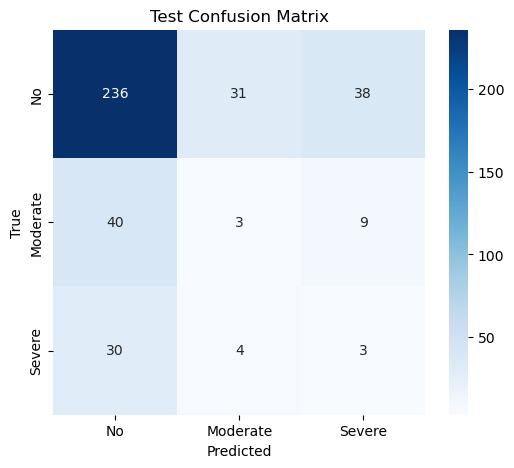

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Moderate", "Severe"],
            yticklabels=["No", "Moderate", "Severe"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()


In [205]:
print(classification_report(
    all_labels,
    all_preds,
    target_names=["No stenosis", "Moderate", "Severe"]
))


              precision    recall  f1-score   support

 No stenosis       0.77      0.77      0.77       305
    Moderate       0.08      0.06      0.07        52
      Severe       0.06      0.08      0.07        37

    accuracy                           0.61       394
   macro avg       0.30      0.30      0.30       394
weighted avg       0.61      0.61      0.61       394



In [168]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import numpy as np
from tqdm import tqdm


In [169]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha)

    def forward(self, logits, targets):
        ce_loss = self.ce(logits, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss


In [170]:
class MultiModalStenosisNet(nn.Module):
    def __init__(self, tab_dim, num_classes=3):
        super().__init__()

        # ---- CNN branch ----
        self.cnn = models.efficientnet_b0(weights="IMAGENET1K_V1")
        in_feats = self.cnn.classifier[1].in_features
        self.cnn.classifier = nn.Identity()

        self.img_head = nn.Sequential(
            nn.Linear(in_feats, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.6)
        )

        # ---- Tabular branch ----
        self.tabular = nn.Sequential(
            nn.Linear(tab_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # ---- Fusion ----
        self.classifier = nn.Sequential(
            nn.Linear(128 + 32, 64),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(64, num_classes)
        )

    def forward(self, image, tab):
        img_feat = self.cnn(image)
        img_feat = self.img_head(img_feat)
        tab_feat = self.tabular(tab)
        fused = torch.cat([img_feat, tab_feat], dim=1)
        return self.classifier(fused)


In [171]:
def freeze_backbone(model):
    for param in model.cnn.parameters():
        param.requires_grad = False

def unfreeze_backbone(model):
    for param in model.cnn.parameters():
        param.requires_grad = True


In [172]:
# example: your counts (adjust if needed)
class_counts = torch.tensor([924, 117, 164], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
weights = torch.clamp(weights, max=2.0)  # IMPORTANT
weights = weights.to(device)

print("Using class weights:", weights)


Using class weights: tensor([0.0688, 0.5435, 0.3877])


In [173]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MultiModalStenosisNet(tab_dim=len(TAB_FEATURES)).to(device)

criterion = FocalLoss(alpha=weights, gamma=2.0)

optimizer = optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=3e-5,
    weight_decay=1e-4
)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=3
)


In [174]:
def train_one_epoch(model, loader):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, tabs, labels in tqdm(loader, leave=False):
        images, tabs, labels = images.to(device), tabs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, tabs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / len(loader), correct / total


@torch.no_grad()
def validate(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0

    for images, tabs, labels in loader:
        images, tabs, labels = images.to(device), tabs.to(device), labels.to(device)
        outputs = model(images, tabs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / len(loader), correct / total


In [175]:
EPOCHS = 30
FREEZE_EPOCHS = 8
best_val_loss = float("inf")
patience, wait = 5, 0

freeze_backbone(model)
print("🔒 CNN backbone frozen")

for epoch in range(EPOCHS):
    if epoch == FREEZE_EPOCHS:
        unfreeze_backbone(model)
        print("🔓 CNN backbone unfrozen")

    train_loss, train_acc = train_one_epoch(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    scheduler.step(val_loss)

    print(f"""
Epoch {epoch+1}/{EPOCHS}
Train Loss: {train_loss:.4f} | Acc: {train_acc:.3f}
Val   Loss: {val_loss:.4f} | Acc: {val_acc:.3f}
""")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        torch.save(model.state_dict(), "best_multimodal_focal_regularized.pth")
        print("✅ Best model saved")
    else:
        wait += 1
        print(f"⚠ No improvement {wait}/{patience}")

    if wait >= patience:
        print("🛑 Early stopping")
        break


🔒 CNN backbone frozen



Epoch 1/30
Train Loss: 0.5302 | Acc: 0.309
Val   Loss: 0.4776 | Acc: 0.327

✅ Best model saved



Epoch 2/30
Train Loss: 0.5161 | Acc: 0.340
Val   Loss: 0.4755 | Acc: 0.335

✅ Best model saved



Epoch 3/30
Train Loss: 0.5250 | Acc: 0.337
Val   Loss: 0.4623 | Acc: 0.451

✅ Best model saved



Epoch 4/30
Train Loss: 0.5222 | Acc: 0.368
Val   Loss: 0.4620 | Acc: 0.424

✅ Best model saved



Epoch 5/30
Train Loss: 0.5101 | Acc: 0.366
Val   Loss: 0.4559 | Acc: 0.490

✅ Best model saved



Epoch 6/30
Train Loss: 0.4910 | Acc: 0.389
Val   Loss: 0.4564 | Acc: 0.463

⚠ No improvement 1/5



Epoch 7/30
Train Loss: 0.5021 | Acc: 0.405
Val   Loss: 0.4354 | Acc: 0.560

✅ Best model saved



Epoch 8/30
Train Loss: 0.5182 | Acc: 0.372
Val   Loss: 0.4442 | Acc: 0.533

⚠ No improvement 1/5
🔓 CNN backbone unfrozen



Epoch 9/30
Train Loss: 0.4830 | Acc: 0.410
Val   Loss: 0.4412 | Acc: 0.553

⚠ No improvement 2/5



Epoch 10/30
Train Loss: 0.4768 | Acc: 0.422
Val   Loss: 0.4358 | Acc: 0.568

⚠ No improvement 3/5



Epoch 11/30
Train Loss: 0.4679 | Acc: 0.427
Val   Loss: 0.4258 | Acc: 0.626

✅ Best model saved



Epoch 12/30
Train Loss: 0.4440 | Acc: 0.466
Val   Loss: 0.4228 | Acc: 0.615

✅ Best model saved



Epoch 13/30
Train Loss: 0.4447 | Acc: 0.472
Val   Loss: 0.4238 | Acc: 0.619

⚠ No improvement 1/5



Epoch 14/30
Train Loss: 0.4366 | Acc: 0.490
Val   Loss: 0.4135 | Acc: 0.603

✅ Best model saved



Epoch 15/30
Train Loss: 0.4169 | Acc: 0.510
Val   Loss: 0.4136 | Acc: 0.615

⚠ No improvement 1/5



Epoch 16/30
Train Loss: 0.4482 | Acc: 0.471
Val   Loss: 0.4028 | Acc: 0.603

✅ Best model saved



Epoch 17/30
Train Loss: 0.3934 | Acc: 0.528
Val   Loss: 0.4138 | Acc: 0.615

⚠ No improvement 1/5



Epoch 18/30
Train Loss: 0.4071 | Acc: 0.512
Val   Loss: 0.4134 | Acc: 0.588

⚠ No improvement 2/5



Epoch 19/30
Train Loss: 0.3789 | Acc: 0.552
Val   Loss: 0.4179 | Acc: 0.595

⚠ No improvement 3/5



Epoch 20/30
Train Loss: 0.3685 | Acc: 0.552
Val   Loss: 0.4164 | Acc: 0.541

⚠ No improvement 4/5



Epoch 21/30
Train Loss: 0.3768 | Acc: 0.558
Val   Loss: 0.4091 | Acc: 0.591

⚠ No improvement 5/5
🛑 Early stopping


In [176]:
model.load_state_dict(
    torch.load("best_multimodal_focal_regularized.pth", map_location=device)
)
model.to(device)
model.eval()


MultiModalStenosisNet(
  (cnn): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (s

In [177]:
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

all_preds = []
all_labels = []

with torch.no_grad():
    for images, tabs, labels in test_loader:
        images = images.to(device)
        tabs = tabs.to(device)

        outputs = model(images, tabs)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


In [178]:
acc = accuracy_score(all_labels, all_preds)
print(f"🎯 Test Accuracy: {acc:.4f}")


🎯 Test Accuracy: 0.5330


In [179]:
bal_acc = balanced_accuracy_score(all_labels, all_preds)
print(f"⚖ Balanced Accuracy: {bal_acc:.4f}")


⚖ Balanced Accuracy: 0.3594


In [180]:
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[189  71  45]
 [ 28  14  10]
 [ 20  10   7]]


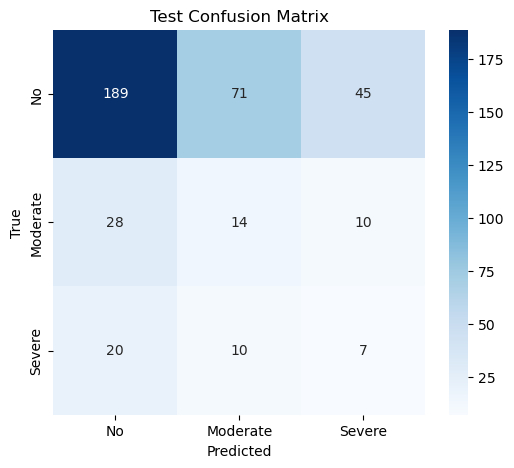

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Moderate", "Severe"],
            yticklabels=["No", "Moderate", "Severe"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()


In [182]:
print(classification_report(
    all_labels,
    all_preds,
    target_names=["No stenosis", "Moderate", "Severe"]
))


              precision    recall  f1-score   support

 No stenosis       0.80      0.62      0.70       305
    Moderate       0.15      0.27      0.19        52
      Severe       0.11      0.19      0.14        37

    accuracy                           0.53       394
   macro avg       0.35      0.36      0.34       394
weighted avg       0.65      0.53      0.58       394



In [206]:
# ------------------------------------
# STEP 1 — Ordinal label preparation
# ------------------------------------

def add_ordinal_targets(df, label_col="final_stenosis_label"):
    """
    Adds ordinal targets:
    ord_ge_1: stenosis >= Moderate
    ord_ge_2: stenosis >= Severe
    """
    df = df.copy()

    # Ensure integer labels
    df[label_col] = df[label_col].astype(int)

    # Ordinal thresholds
    df["ord_ge_1"] = (df[label_col] >= 1).astype(int)
    df["ord_ge_2"] = (df[label_col] >= 2).astype(int)

    return df


In [207]:
train_df = add_ordinal_targets(train_df)
val_df   = add_ordinal_targets(val_df)
test_df  = add_ordinal_targets(test_df)


In [227]:
import pandas as pd

# ==============================
# STEP 2 — ORDINAL LABEL CREATION
# ==============================

INPUT_CSV  = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Files/FINAL_DATASET_MODEL_READY.csv"
OUTPUT_CSV = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/FINAL_DATASET_ORDINAL.csv"

df = pd.read_csv(INPUT_CSV)

# ---- sanity check ----
assert "final_stenosis_label" in df.columns, "Missing final_stenosis_label column"

# ---- remove NaNs (you decided this earlier) ----
df = df.dropna(subset=["final_stenosis_label"]).reset_index(drop=True)

# ---- ensure integer ----
df["final_stenosis_label"] = df["final_stenosis_label"].astype(int)

# ---- ordinal encoding ----
df["ord_ge_1"] = (df["final_stenosis_label"] >= 1).astype(int)
df["ord_ge_2"] = (df["final_stenosis_label"] >= 2).astype(int)

# ---- verify distribution ----
print("\nOrdinal distribution:")
print(
    df.groupby("final_stenosis_label")[["ord_ge_1", "ord_ge_2"]]
      .sum()
)

# ---- save ----
df.to_csv(OUTPUT_CSV, index=False)
print("\n✅ STEP 2 DONE → Saved:", OUTPUT_CSV)



Ordinal distribution:
                      ord_ge_1  ord_ge_2
final_stenosis_label                    
0                            0         0
1                          201         0
2                          201       201

✅ STEP 2 DONE → Saved: /work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/FINAL_DATASET_ORDINAL.csv


In [230]:
print(df.columns.tolist())


['image', 'roi_path', 'jet_area', 'jet_width', 'jet_height', 'jet_length', 'red_ratio', 'orange_yellow_ratio', 'blue_ratio', 'PS', 'ED', 'Side', 'prox_ica_right_stenosis', 'prox_ica_left_stenosis', 'detected_side_value', 'Patient_Number', 'final_stenosis_label', 'side_enc', 'PS_missing', 'ED_missing', 'ord_ge_1', 'ord_ge_2']


In [248]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# =========================
# FILE PATHS
# =========================
INPUT_CSV = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/FINAL_DATASET_ORDINAL.csv"

TRAIN_CSV = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/train.csv"
VAL_CSV   = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/val.csv"
TEST_CSV  = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/test.csv"

# =========================
# LOAD DATA
# =========================
df = pd.read_csv(INPUT_CSV)

# =========================
# SANITY CHECKS
# =========================
required_cols = [
    "roi_path",
    "Patient_Number",
    "final_stenosis_label",
    "ord_ge_1",
    "ord_ge_2"
]

for col in required_cols:
    assert col in df.columns, f"Missing column: {col}"

print("✅ Dataset loaded")
print("Total samples:", len(df))
print("Unique patients:", df["Patient_Number"].nunique())
print("\nLabel distribution:")
print(df["final_stenosis_label"].value_counts())

# =========================
# SPLIT 1 — TEST (15%)
# =========================
gss_test = GroupShuffleSplit(
    n_splits=1,
    test_size=0.15,
    random_state=42
)

trainval_idx, test_idx = next(
    gss_test.split(df, groups=df["Patient_Number"])
)

trainval_df = df.iloc[trainval_idx].reset_index(drop=True)
test_df     = df.iloc[test_idx].reset_index(drop=True)

# =========================
# SPLIT 2 — TRAIN / VAL
# (15% val from remaining → ~70/15/15)
# =========================
gss_val = GroupShuffleSplit(
    n_splits=1,
    test_size=0.176,  # 0.176 × 85% ≈ 15%
    random_state=42
)

train_idx, val_idx = next(
    gss_val.split(trainval_df, groups=trainval_df["Patient_Number"])
)

train_df = trainval_df.iloc[train_idx].reset_index(drop=True)
val_df   = trainval_df.iloc[val_idx].reset_index(drop=True)

# =========================
# SAVE SPLITS
# =========================
train_df.to_csv(TRAIN_CSV, index=False)
val_df.to_csv(VAL_CSV, index=False)
test_df.to_csv(TEST_CSV, index=False)

# =========================
# REPORT
# =========================
print("\n✅ SPLIT COMPLETE")
print(f"Train: {len(train_df)} samples | {train_df['Patient_Number'].nunique()} patients")
print(f"Val  : {len(val_df)} samples | {val_df['Patient_Number'].nunique()} patients")
print(f"Test : {len(test_df)} samples | {test_df['Patient_Number'].nunique()} patients")


✅ Dataset loaded
Total samples: 1856
Unique patients: 50

Label distribution:
final_stenosis_label
0    1454
1     201
2     201
Name: count, dtype: int64

✅ SPLIT COMPLETE
Train: 1295 samples | 34 patients
Val  : 296 samples | 8 patients
Test : 265 samples | 8 patients


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm
import os




In [10]:
TRAIN_CSV = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/ordinal_train.csv"
VAL_CSV   = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/ordinal_val.csv"
TEST_CSV = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Ordinal_model/ordinal_test.csv"
ROOT_IMG = "/work/SanzidaAkterChadne#0992/Jobs/JupyterLab/5486489/main/Raw_data_stenosis/stenosis_project/data/Extracted_roi_folder"  # not used directly, roi_path is used

train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)


In [12]:
TAB_FEATURES = [
    "jet_area", "jet_width", "jet_height", "jet_length",
    "red_ratio", "orange_yellow_ratio", "blue_ratio",
    "side_enc", "PS_missing", "ED_missing"
]


In [13]:
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [14]:
class OrdinalMultimodalDataset(Dataset):
    def __init__(self, df, root_img, tab_features, transform=None):
        self.df = df.reset_index(drop=True)
        self.root_img = root_img
        self.tab_features = tab_features
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # IMAGE
        img_path = row["roi_path"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # TABULAR (FORCE FLOAT)
        tab = torch.tensor(
            row[self.tab_features].astype(float).values,
            dtype=torch.float32
        )

        # ORDINAL TARGET (ALWAYS SIZE 2)
        target = torch.tensor(
            [row["ord_ge_1"], row["ord_ge_2"]],
            dtype=torch.float32
        )

        return image, tab, target


In [15]:
train_dataset = OrdinalMultimodalDataset(
    train_df, ROOT_IMG, TAB_FEATURES, image_transforms
)
val_dataset = OrdinalMultimodalDataset(
    val_df, ROOT_IMG, TAB_FEATURES, image_transforms
)
test_dataset = OrdinalMultimodalDataset(
    test_df, ROOT_IMG, TAB_FEATURES, image_transforms
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [16]:
images, tabs, targets = next(iter(train_loader))
print("Images:", images.shape)
print("Tabular:", tabs.shape)
print("Targets:", targets.shape)


Images: torch.Size([16, 3, 224, 224])
Tabular: torch.Size([16, 10])
Targets: torch.Size([16, 2])


In [7]:
print(train_df[TAB_FEATURES].dtypes)


jet_area                 int64
jet_width                int64
jet_height               int64
jet_length             float64
red_ratio              float64
orange_yellow_ratio    float64
blue_ratio             float64
side_enc                 int64
PS_missing               int64
ED_missing               int64
dtype: object


In [17]:
class OrdinalMultiModalNet(nn.Module):
    def __init__(self, tab_dim):
        super().__init__()

        self.cnn = models.efficientnet_b0(weights="IMAGENET1K_V1")
        self.cnn.classifier = nn.Identity()
        cnn_out = 1280

        self.tabular = nn.Sequential(
            nn.Linear(tab_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64)
        )

        self.classifier = nn.Linear(cnn_out + 64, 2)

    def forward(self, image, tab):
        img_feat = self.cnn(image)
        tab_feat = self.tabular(tab)
        fused = torch.cat([img_feat, tab_feat], dim=1)
        return self.classifier(fused)


In [18]:
def ordinal_logits_to_class(logits):
    probs = torch.sigmoid(logits)
    return (probs > 0.5).sum(dim=1)


In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = OrdinalMultiModalNet(tab_dim=len(TAB_FEATURES)).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)


In [22]:
from tqdm import tqdm

def train_one_epoch(model, loader):
    model.train()
    total_loss, correct, total = 0, 0, 0

    progress = tqdm(loader, desc="Training", leave=False)

    for images, tabs, targets in progress:
        images = images.to(device)
        tabs = tabs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        logits = model(images, tabs)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)

        preds = ordinal_logits_to_class(logits)
        true  = ordinal_logits_to_class(targets)

        correct += (preds == true).sum().item()
        total += images.size(0)

        progress.set_postfix(loss=loss.item())

    return total_loss / total, correct / total


@torch.no_grad()
def validate(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0

    progress = tqdm(loader, desc="Validating", leave=False)

    for images, tabs, targets in progress:
        images = images.to(device)
        tabs = tabs.to(device)
        targets = targets.to(device)

        logits = model(images, tabs)
        loss = criterion(logits, targets)

        total_loss += loss.item() * images.size(0)

        preds = ordinal_logits_to_class(logits)
        true  = ordinal_logits_to_class(targets)

        correct += (preds == true).sum().item()
        total += images.size(0)

        progress.set_postfix(loss=loss.item())

    return total_loss / total, correct / total



In [23]:
EPOCHS = 30
PATIENCE = 5
best_val_loss = float("inf")
no_improve = 0

for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Train Loss {train_loss:.4f} Acc {train_acc:.3f} | "
        f"Val Loss {val_loss:.4f} Acc {val_acc:.3f}"
    )

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_ordinal_multimodal.pth")
        no_improve = 0
        print("✅ Saved best model")
    else:
        no_improve += 1
        print(f"⚠ No improvement {no_improve}/{PATIENCE}")

    if no_improve >= PATIENCE:
        print("🛑 Early stopping")
        break


Epoch 1/30 | Train Loss 0.1830 Acc 0.892 | Val Loss 0.3695 Acc 0.821
✅ Saved best model


Epoch 2/30 | Train Loss 0.2190 Acc 0.868 | Val Loss 0.4586 Acc 0.811
⚠ No improvement 1/5


Epoch 3/30 | Train Loss 0.2843 Acc 0.839 | Val Loss 0.3847 Acc 0.818
⚠ No improvement 2/5


Epoch 4/30 | Train Loss 0.2347 Acc 0.876 | Val Loss 0.5887 Acc 0.716
⚠ No improvement 3/5


Epoch 5/30 | Train Loss 0.1410 Acc 0.913 | Val Loss 0.4072 Acc 0.801
⚠ No improvement 4/5


Epoch 6/30 | Train Loss 0.2297 Acc 0.901 | Val Loss 0.4949 Acc 0.767
⚠ No improvement 5/5
🛑 Early stopping


In [24]:
import torch
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load best model weights
model.load_state_dict(torch.load("best_ordinal_multimodal.pth", map_location=device))
model.to(device)
model.eval()

print("✅ Best model loaded for TEST evaluation")


✅ Best model loaded for TEST evaluation


In [27]:
import torch

def ordinal_logits_to_class(logits, threshold=0.5):
    """
    logits: Tensor [B, 2]
    returns: Tensor [B] with class {0,1,2}
    """
    probs = torch.sigmoid(logits)
    preds = (probs > threshold).int()
    # number of passed thresholds = class
    return preds.sum(dim=1)


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load best model
model.load_state_dict(
    torch.load("best_ordinal_multimodal.pth", map_location=device)
)
model.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    for images, tabs, targets in test_loader:
        images = images.to(device)
        tabs = tabs.to(device)
        targets = targets.to(device)          # shape [B, 2]

        logits = model(images, tabs)           # shape [B, 2]

        # ordinal → class
        preds = ordinal_logits_to_class(logits)
        true  = targets.sum(dim=1).long()

        all_preds.append(preds.cpu())
        all_targets.append(true.cpu())

y_pred = torch.cat(all_preds).numpy()
y_true = torch.cat(all_targets).numpy()

# Metrics
acc = accuracy_score(y_true, y_pred)
bal_acc = balanced_accuracy_score(y_true, y_pred)

print(f"🎯 Test Accuracy: {acc:.4f}")
print(f"⚖ Balanced Accuracy: {bal_acc:.4f}")


🎯 Test Accuracy: 0.6792
⚖ Balanced Accuracy: 0.3565


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(
    classification_report(
        y_true,
        y_pred,
        target_names=["No stenosis", "Moderate", "Severe"],
        digits=3
    )
)


Confusion Matrix:
[[178  15   8]
 [ 35   1  22]
 [  4   1   1]]

Classification Report:
              precision    recall  f1-score   support

 No stenosis      0.820     0.886     0.852       201
    Moderate      0.059     0.017     0.027        58
      Severe      0.032     0.167     0.054         6

    accuracy                          0.679       265
   macro avg      0.304     0.356     0.311       265
weighted avg      0.636     0.679     0.653       265



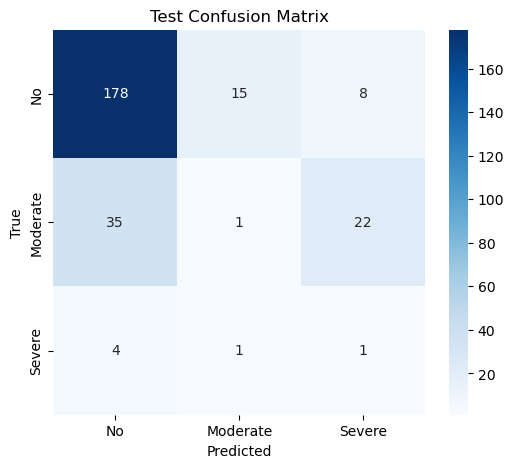

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Moderate", "Severe"],
            yticklabels=["No", "Moderate", "Severe"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()
